# Backbone

In [1]:
import networkx as nx
import pandas as pd

In [2]:
import sys
sys.path.append("../")

from MapSci.papers import papers
from MapSci.research_space import research_space

In [3]:
areas = pd.read_pickle("../dataset/SJR/areas.pkl")
dict_area = areas[["Field", "Classification"]].set_index("Field").to_dict()["Classification"]

In [4]:
pp = papers("intermediate", dict_area)
maps = research_space("intermediate", pp)
maps.compute(2000, 2013, model="chinazzi")

chinazzi(2000, 2013, 0.1, 200)


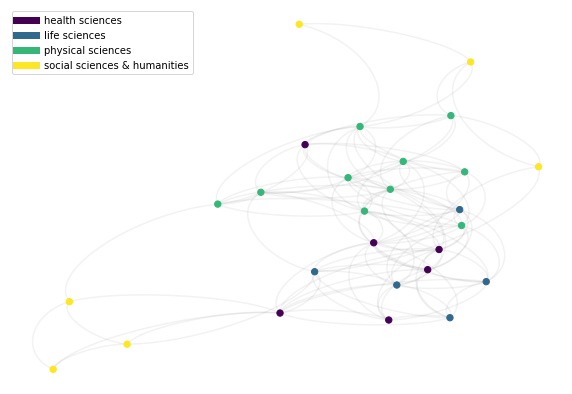

In [19]:
fields = maps.phi["chinazzi(2000, 2013, 0.1, 200)"][1].keys()
dict_area = areas[["Classification", "Subject area"]].set_index("Classification").to_dict()["Subject area"]
unique = areas["Subject area"].unique()
subs = {u: v for v,u in enumerate(sorted(unique))}
values = [subs[dict_area[node]] for node in fields]
pos = maps.plot("chinazzi(2000, 2013, 0.1, 200)", values, labels=subs, new=True, threshold=0.4)

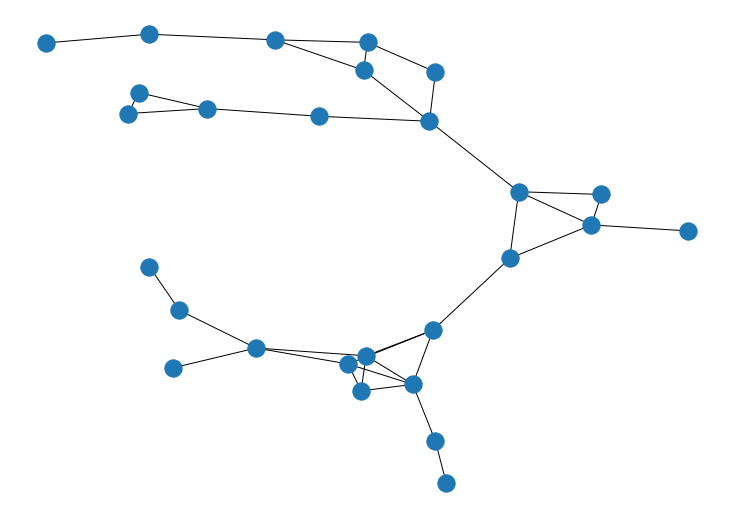

In [26]:
bb = maps.get_backbone("chinazzi(2000, 2013, 0.1, 200)", alpha=0.15)
nx.draw(bb)